## 03-Csúcs keresés

A `../data/pupos` file tartalmaz egy zajos adatsort.

- Illesszünk erre az adatsorra két Gauss-görbe összegét! $$ f_{2G}(x)=A_1 \mathrm{e}^{-(x-e_1)^2/s_1^2}+A_2 \mathrm{e}^{-(x-e_2)^2/s_2^2} $$

- Illesszünk erre az adatsorra két Lorentz-görbe összegét is! $$ f_{2L}(x)=\frac{B_1}{w_1^2+(x-p_1)^2}+\frac{B_2}{w_2^2+(x-p_2)^2} $$

Ábrázoljuk az eredeti adatsort, illetve mind a két esetben ábrázoljuk az illesztés eredményét is! Ha az illesztés során esetleg problémákba ütközünk, akkor próbálkozzunk az illesztési paraméterek kezdeti értékének becslésével!

In [28]:
%pylab inline
from scipy.optimize import curve_fit # Az illesztéshez használt függvény
from numpy.fft import *              # Fourier-analízishez használt rutinok
from scipy.signal import spectrogram # Spektrogramm készítő függvény


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


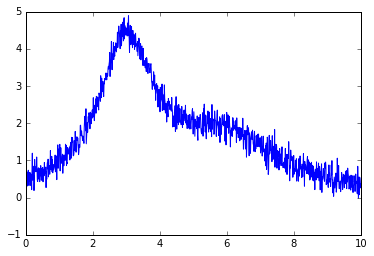

In [29]:
x,y=loadtxt('../data/pupos.txt',unpack=True)   # betöltöm az adatokat majd plotolom
plot(x,y)   

In [30]:
def fug(t,A1,e1,s1,A2,e2,s2):
    'Ket Gauss-gorbe osszege'                       # definiálom a függvényemet
    return A1*exp(-((t-e1)/s1)**2)+A2*exp(-((t-e2)/s2)**2)

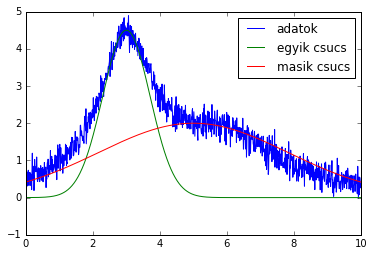

In [31]:
plot(x,y,label='adatok') # az eredeti
plot(x,4.5*exp(-((x-3)/1)**2),label='egyik csucs') # a magas csúcs
plot(x,2*exp(-((x-5)/4)**2),label='masik csucs')  # a lecsengése
legend()


In [32]:
A1=4.5;e1=3;s1=1
A2=2;e2=5;s2=4
popt,pcov=curve_fit(fug,x,y,p0=[A1,e1,s1,A2,e2,s2]) # beírom az értékeket
perr = sqrt(diag(pcov))

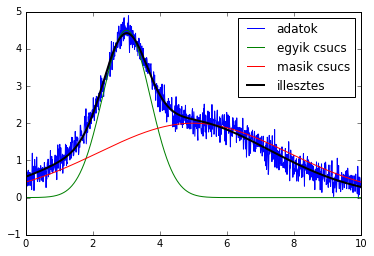

In [33]:
plot(x,y,label='adatok') # az eredetiek
plot(x,4.5*exp(-((x-3)/1)**2),label='egyik csucs') # a maximum
plot(x,2*exp(-((x-5)/4)**2),label='masik csucs')  # a lecsengés
plot(x,fug(x,*popt),label='illesztes',color='black',linewidth=2) # az illesztett görbe
legend(loc='upper right')


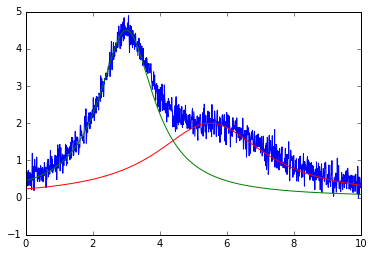

In [34]:
plot(x,y,label='adatok') # az adatok
plot(x,(4.5 / (1**2 + (x - 3)**2)),label='egyik csucs') # a maximum csúcs
plot(x,(8 / (2**2 + (x - 5.5)**2)),label='masik csucs')  # a slecsengés


In [35]:
def lor(x,B1,B2,w1,w2,p1,p2):
    return (B1 / (w1**2 + (x - p1)**2)) + (B2 / (w2**2 + (x - p2)**2))
B1=4.5;w1=1;p1=3
B2=8;w2=2;p2=5.5
popt2,pcov2=curve_fit(lorentz,x,y,p0=[B1,B2,w1,w2,p1,p2]) # felírom a becsült értékeket
print(popt2,diag(pcov2))


[ 3.82636631  6.09667856  0.97919831  1.99282906  2.9956378   5.91584615] [  1.36350908e-02   1.19530984e-01   1.94371627e-04   3.14565300e-03
   5.29224079e-05   1.54751666e-03]


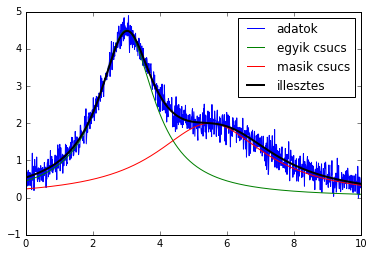

In [36]:
plot(x,y,label='adatok') # az eredeti adatok
plot(x,(4.5 / (1**2 + (x - 3)**2)),label='egyik csucs') # a maximum
plot(x,(8 / (2**2 + (x - 5.5)**2)),label='masik csucs')  # a lecsengés
plot(x,lor(x,*popt2),label='illesztes',color='black',linewidth=2) # az illesztett görbe
legend(loc='upper right')


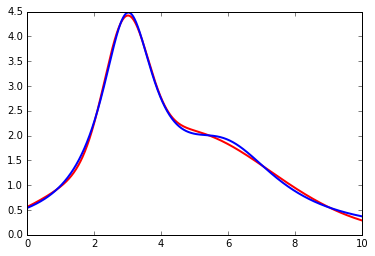

In [37]:
#külön külön az illesztések
plot(x,fug(x,*popt),label='illesztes',color='red',linewidth=2) 
plot(x,lor(x,*popt2),label='illesztes',color='blue',linewidth=2)
